In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler

from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 

In [2]:
xls=pd.ExcelFile('bank.xls') 
dt=pd.read_excel(xls,'Data')   

In [3]:
dt.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
dt.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
dt.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
dt.isnull().count()

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [8]:
dt.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [9]:
dt.rename({'ZIP Code': 'zip_code'},axis=1,inplace=True)

In [10]:
dt.head()

,ID,Age,Experience,Income,zip_code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [11]:
dt['zip_code']=pd.factorize(pd.lib.fast_zip([dt.zip_code.values]))[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.lib.fast_zip is deprecated and will be removed in a future version.
  """Entry point for launching an IPython kernel.


In [12]:
x=dt.drop('Personal Loan',axis=1)
y=dt.pop('Personal Loan')

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

logic=LogisticRegression()
logic.fit(xtrain,ytrain)
ypred_logic=logic.predict(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
DT=DecisionTreeClassifier()

In [15]:
nvb=GaussianNB()
nvb.fit(xtrain,ytrain)
ypred_nvb=nvb.predict(xtest)

In [16]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred_knn=knn.predict(xtest)

In [17]:
ran=RandomForestClassifier()
ran.fit(xtrain,ytrain)
ypred_ran=ran.predict(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parameter={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
GS=GridSearchCV(knn,parameter,cv=3,scoring='recall')
GS.fit(x,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [19]:
GS.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [20]:
parameter={'criterion':['gini','entropy'],'max_depth':np.arange(5,15)}
grid=GridSearchCV(DT,param_grid=parameter,cv=5)

In [21]:
grid.fit(x,y)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [22]:
parameters={'n_estimators': np.arange(10,50),'criterion':['gini','entropy']}
grid=GridSearchCV(RandomForestClassifier(),param_grid=parameters,cv=5,scoring='recall')
grid.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [23]:
grid.best_params_

{'criterion': 'gini', 'n_estimators': 15}

In [24]:
LR=LogisticRegression()
NB=GaussianNB()
KNN=KNeighborsClassifier(metric= 'manhattan', n_neighbors= 1, weights= 'uniform')
RF=RandomForestClassifier(criterion= 'gini', n_estimators= 25)
DT=DecisionTreeClassifier(criterion= 'gini', max_depth= 6)

In [25]:
sc=StandardScaler()
x=sc.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [26]:
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

In [27]:
logic=LogisticRegression()#we already created the logic regression model
logic_bag=BaggingClassifier(base_estimator=logic, n_estimators=7,random_state=0)
nvb_bag=BaggingClassifier(base_estimator=nvb, n_estimators=7,random_state=0)
knn_bag=BaggingClassifier(base_estimator=knn, n_estimators=20,random_state=0)
DT_bag=BaggingClassifier(n_estimators=6,random_state=0)

In [28]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,auc,roc_auc_score,roc_curve

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [30]:
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
for model,names in zip([LR,NB,KNN,RF,DT],['LR','NB','KNN','RF','DT']):
    auc_=[]
    for train,test in kfold.split(x,y):
        x_train,x_test=x[train,:],x[test,:]
        y_train,y_test=y[train],y[test]
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        fpr,tpr,_=roc_curve(y_test,y_pred)
        auc_.append(auc(fpr,tpr))
    print(f'Area under AUC {np.mean(auc_):.2f} (+/-  {np.var(auc_,ddof=1):.6f}) [{names}] ')


Area under AUC 0.81 (+/-  0.000271) [LR] 
Area under AUC 0.75 (+/-  0.000669) [NB] 
Area under AUC 0.78 (+/-  0.000605) [KNN] 
Area under AUC 0.93 (+/-  0.000356) [RF] 
Area under AUC 0.94 (+/-  0.000115) [DT] 


# BAGGING

In [31]:
bagged_LR=BaggingClassifier(LR,n_estimators=10,random_state=0)
bagged_NB=BaggingClassifier(NB,n_estimators=10,random_state=0)
bagged_KNN=BaggingClassifier(KNN,n_estimators=50,random_state=0)
bagged_DT=BaggingClassifier(DT,n_estimators=40,random_state=0)


In [32]:
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
for model,names in zip([LR,bagged_LR,NB,bagged_NB,KNN,bagged_KNN,RF,DT,bagged_DT],
                       ['LR','bagged_LR','NB','bagged_NB','KNN','bagged_KNN','RF','DT','bagged_DT']):
    auc_=[]
    for train,test in kfold.split(x,y):
        x_train,x_test=x[train,:],x[test,:]
        y_train,y_test=y[train],y[test]
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        fpr,tpr,_=roc_curve(y_test,y_pred)
        auc_.append(auc(fpr,tpr))
    print(f'Area under AUC {np.mean(auc_):.2f} (+/-  {np.var(auc_,ddof=1):.6f}) [{names}] ')


Area under AUC 0.81 (+/-  0.000271) [LR] 
Area under AUC 0.81 (+/-  0.000257) [bagged_LR] 
Area under AUC 0.75 (+/-  0.000669) [NB] 
Area under AUC 0.75 (+/-  0.000563) [bagged_NB] 
Area under AUC 0.78 (+/-  0.000605) [KNN] 
Area under AUC 0.78 (+/-  0.000617) [bagged_KNN] 
Area under AUC 0.94 (+/-  0.000108) [RF] 
Area under AUC 0.94 (+/-  0.000106) [DT] 
Area under AUC 0.95 (+/-  0.000059) [bagged_DT] 


In [33]:
models = []
models.append(('bagged_DT',bagged_DT))
models.append(('bagged_KNN', bagged_KNN))
models.append(('bagged_NB', bagged_NB))
models.append(('bagged_LR',bagged_LR))

bagged_DT: 0.888842 (0.000764)
bagged_KNN: 0.584069 (0.001498)
bagged_NB: 0.578466 (0.004232)
bagged_LR: 0.634490 (0.000178)


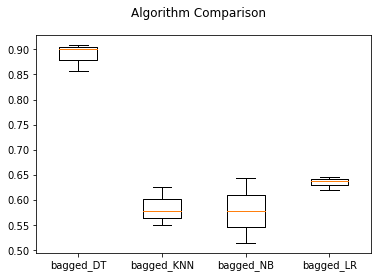

In [34]:
# evaluate each model in turn
results = []
names = []
scoring = 'recall'
for name, model in models:
	kfold = model_selection.KFold(n_splits=3,random_state=2)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var(ddof=1))
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# ADABOOSTING

In [37]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_LR=AdaBoostClassifier(LR,n_estimators=120,random_state=0)
adaboost_NB=AdaBoostClassifier(NB,n_estimators=100,random_state=0)
adaboost_RF=AdaBoostClassifier(RF,n_estimators=100,random_state=0)
adaboost_DT=AdaBoostClassifier(DT,n_estimators=100,random_state=0)



# gradient boosting

In [38]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingClassifier

grad_DT=GradientBoostingClassifier(n_estimators=100,random_state=0)

In [39]:
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
for model,names in zip([LR,bagged_LR,adaboost_LR,NB,bagged_NB,adaboost_NB,KNN,bagged_KNN,RF,adaboost_RF,
                        DT,bagged_DT,adaboost_DT,grad_DT],
                       ['LR','bagged_LR','adaboost_LR','NB','bagged_NB','adaboost_NB','KNN','bagged_KNN',
                        'RF','adaboost_RF','DT','bagged_DT','adaboost_DT','grad_DT']):
    auc_=[]
    for train,test in kfold.split(x,y):
        x_train,x_test=x[train,:],x[test,:]
        y_train,y_test=y[train],y[test]
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        fpr,tpr,_=roc_curve(y_test,y_pred)
        auc_.append(auc(fpr,tpr))
    print(f'Area under AUC {np.mean(auc_):.2f} (+/-  {np.var(auc_,ddof=1):.6f}) [{names}] ')


Area under AUC 0.81 (+/-  0.000271) [LR] 
Area under AUC 0.81 (+/-  0.000257) [bagged_LR] 
Area under AUC 0.79 (+/-  0.000383) [adaboost_LR] 
Area under AUC 0.75 (+/-  0.000669) [NB] 
Area under AUC 0.75 (+/-  0.000563) [bagged_NB] 
Area under AUC 0.51 (+/-  0.008981) [adaboost_NB] 
Area under AUC 0.78 (+/-  0.000605) [KNN] 
Area under AUC 0.78 (+/-  0.000617) [bagged_KNN] 
Area under AUC 0.94 (+/-  0.000381) [RF] 
Area under AUC 0.93 (+/-  0.000317) [adaboost_RF] 
Area under AUC 0.94 (+/-  0.000084) [DT] 
Area under AUC 0.95 (+/-  0.000059) [bagged_DT] 
Area under AUC 0.94 (+/-  0.000332) [adaboost_DT] 
Area under AUC 0.95 (+/-  0.000232) [grad_DT] 


In [40]:
models = []
models.append(('adaboost_DT',adaboost_DT))
models.append(('adaboost_RF', adaboost_RF))
models.append(('adaboost_LR', adaboost_LR))
models.append(('adaboost_NB',adaboost_NB))

adaboost_DT: 0.858656 (0.000796)
adaboost_RF: 0.838184 (0.000177)
adaboost_LR: 0.588639 (0.001894)
adaboost_NB: 0.712469 (0.029458)


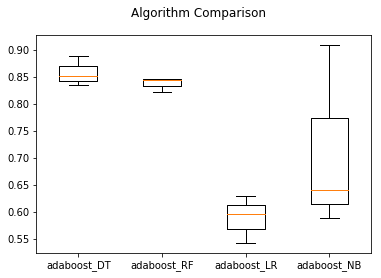

In [41]:
# evaluate each model in turn
results = []
names = []
scoring = 'recall'
for name, model in models:
	kfold = model_selection.KFold(n_splits=3,random_state=2)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var(ddof=1))
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# STACKED MODEL¶

In [42]:
from sklearn.ensemble import VotingClassifier

In [43]:
stack_soft=VotingClassifier(estimators=[('grad_DT',grad_DT),('adaboost_LR',adaboost_LR),('adaboost_RF',adaboost_RF)],voting ='soft')

In [44]:
stack_hard=VotingClassifier(estimators=[('grad_DT',grad_DT),('adaboost_LR',adaboost_LR),('adaboost_RF',adaboost_RF)],voting ='hard')

In [45]:
kfold=KFold(n_splits=5,shuffle=True,random_state=1)
for model,names in zip([LR,bagged_LR,adaboost_LR,NB,bagged_NB,adaboost_NB,KNN,bagged_KNN,RF,adaboost_RF,
                        DT,bagged_DT,adaboost_DT,grad_DT,stack_soft,stack_hard],
                       ['LR','bagged_LR','adaboost_LR','NB','bagged_NB','adaboost_NB','KNN','bagged_KNN',
                        'RF','adaboost_RF','DT','bagged_DT','adaboost_DT','grad_DT','stack_soft','stack_hard']):
    auc_=[]
    for train,test in kfold.split(x,y):
        x_train,x_test=x[train,:],x[test,:]
        y_train,y_test=y[train],y[test]
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        fpr,tpr,_=roc_curve(y_test,y_pred)
        auc_.append(auc(fpr,tpr))
    print(f'Area under AUC {np.mean(auc_):.2f} (+/-  {np.var(auc_,ddof=1):.6f}) [{names}] ')


Area under AUC 0.81 (+/-  0.000271) [LR] 
Area under AUC 0.81 (+/-  0.000257) [bagged_LR] 
Area under AUC 0.79 (+/-  0.000383) [adaboost_LR] 
Area under AUC 0.75 (+/-  0.000669) [NB] 
Area under AUC 0.75 (+/-  0.000563) [bagged_NB] 
Area under AUC 0.51 (+/-  0.008981) [adaboost_NB] 
Area under AUC 0.78 (+/-  0.000605) [KNN] 
Area under AUC 0.78 (+/-  0.000617) [bagged_KNN] 
Area under AUC 0.94 (+/-  0.000229) [RF] 
Area under AUC 0.93 (+/-  0.000317) [adaboost_RF] 
Area under AUC 0.94 (+/-  0.000081) [DT] 
Area under AUC 0.95 (+/-  0.000059) [bagged_DT] 
Area under AUC 0.94 (+/-  0.000332) [adaboost_DT] 
Area under AUC 0.95 (+/-  0.000232) [grad_DT] 
Area under AUC 0.95 (+/-  0.000287) [stack_soft] 
Area under AUC 0.93 (+/-  0.000291) [stack_hard] 


In [46]:
models = []
models.append(('DT_bag',DT_bag))
models.append(('knn_bag', knn_bag))
models.append(('logic_bag', logic_bag))
models.append(('nvb',nvb_bag))
models.append(('adaboost_DT',adaboost_DT))
models.append(('adaboost_RF', adaboost_RF))
models.append(('adaboost_LR', adaboost_LR))
models.append(('adaboost_NB',adaboost_NB))
models.append(('bagged_DT',bagged_DT))
models.append(('bagged_KNN', bagged_KNN))
models.append(('bagged_NB', bagged_NB))
models.append(('bagged_LR',bagged_LR))


DT_bag: 0.849922 (0.000833)
knn_bag: 0.519769 (0.003071)
logic_bag: 0.633767 (0.000678)
nvb: 0.580814 (0.003795)
adaboost_DT: 0.858656 (0.000796)
adaboost_RF: 0.838184 (0.000177)
adaboost_LR: 0.588639 (0.001894)
adaboost_NB: 0.712469 (0.029458)
bagged_DT: 0.888842 (0.000764)
bagged_KNN: 0.584069 (0.001498)
bagged_NB: 0.578466 (0.004232)
bagged_LR: 0.634490 (0.000178)


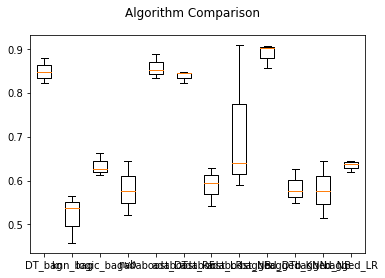

In [50]:
# evaluate each model in turn
results = []
names = []
scoring = 'recall'
for name, model in models:
	kfold = model_selection.KFold(n_splits=3,random_state=2)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var(ddof=1))
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Since the bagged decision tree  is having less bias error  and variance error compare to other classifiers. we can choose bagged decision tree for this data set